<a href="https://colab.research.google.com/github/Venni2911/LogicMojo-AI-ML-Sept25-VenniRaj/blob/main/Clustering_Assignment_Answer%20notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement :  HELP International, an NGO wants to help the countries fight poverty and help them at the time of disaster and calamity by providing funds and resources. They want to weigh in socio economic and health factors of all the countries and choose the top 5 countries who are in dire need of teh resources



#### Aim is to cluster the data sets based on socio economic, health and overall development of the country to segment them and then analyse based on GDP per capita, Income and Child Mortality to recommend top 5 countries to the CEO.

#### Steps we'll folow with the assignemnt are as follows:

1. Data Inspection and EDA - Preparation and Basic Analysis
2. Outlier Analysis and Scaling - Data Preparation
3. Checking the tendency of the data - Hopkins Statistics
4. Modelling- Both Kmeans and Heirarchical
5. Visualizations and Cluster Profiling
6. Results and Recommendations

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the dataset

df = pd.read_csv("Country-data.csv", header=0)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.shape

(167, 10)

In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

#### Since most columns are already in the form we want for clustering we do not need to change/ cpnvert anything, we can start with our EDA to get us a primilary analysis, for that we will create another df which will have all numeric data which we will actually use in clustering. Also we would use all the variables for analysis and just use gdpp, income and child_mort for cluster profiling

In [ ]:
# Creating numerical df

num_df = df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]
num_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Univariate Analysis

In [ ]:
num_df.shape

(167, 9)

In [ ]:
num_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### No nulls so we do not need to treat any null rows/columns

In [ ]:
f = num_df.columns
f

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

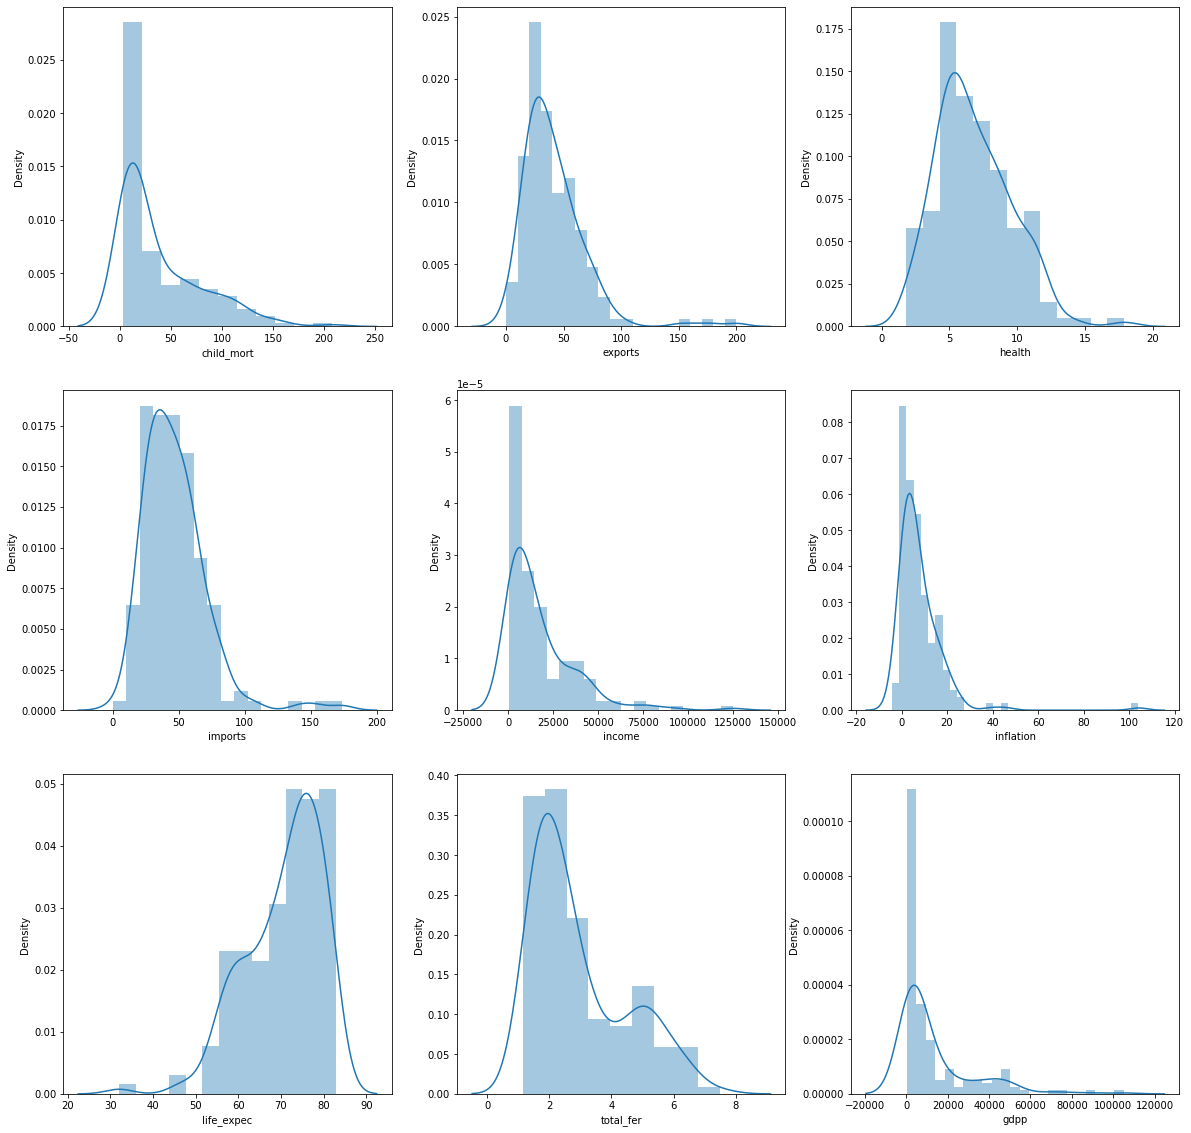

In [ ]:
#Crteating distribution plots to get an idea about the data

plt.figure(figsize = (20,20))
f = num_df.columns
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(num_df[i[1]])

#### Income, gdpp, child_mort, total_fer do not seem to be following the normal ditribution as teh initial values are too big and they decrease as the variable values increase, anyway we were using them to profile our clusters

#### Outlier analysis

<AxesSubplot:xlabel='income'>

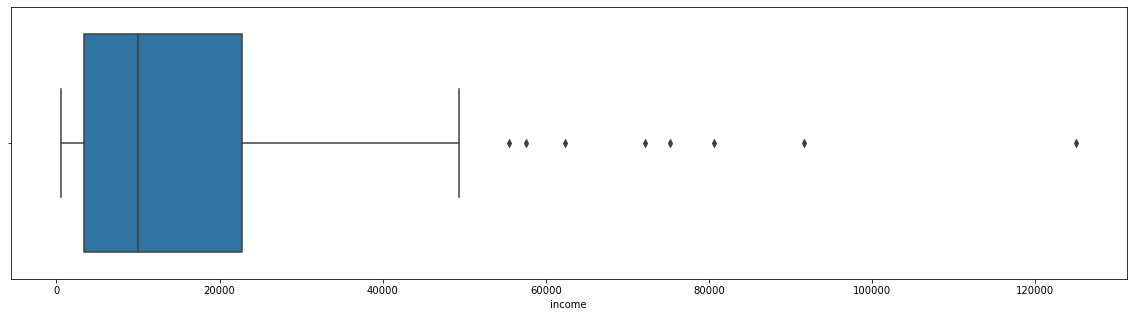

In [ ]:
# Making boxplots to check teh outliers are treat them wherever necessary

plt.figure(figsize = (20,5))
sns.boxplot(x = num_df.income, data =num_df)

#### There are a couple of outliers on the higher side but they seem to be very few and based on business knowledge we may expect some nations net income to be very large, we might want to treat them with a upper cap

<AxesSubplot:xlabel='gdpp'>

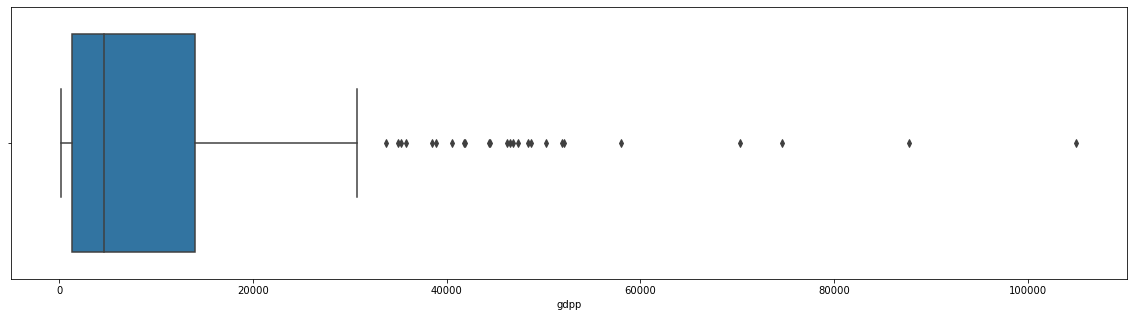

In [ ]:

plt.figure(figsize = (20,5))
sns.boxplot(x = num_df.gdpp, data =num_df)

#### There are a couple of outliers on the higher side but they seem to be very few and based on business knowledge we may expect some nations net gdpp to be very large, we might want to treat them with quantile upper cap

<AxesSubplot:xlabel='imports'>

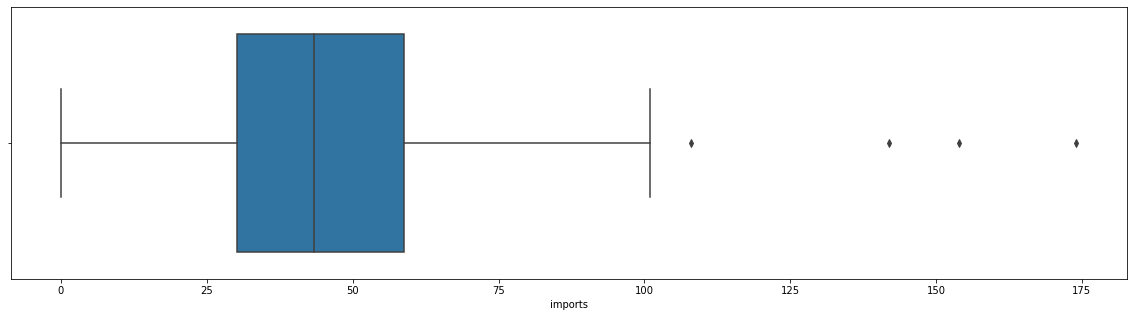

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(x = num_df.imports, data =num_df)

#### Not a lot of outliers so we will keep it the way it is. Also since the outliers are less, it wont skew our data much in any direction, also based on business knowledge there might be a couple of countries which import a lot and are dire need of resources so by removing thgem we might cause data to be lost

<AxesSubplot:xlabel='exports'>

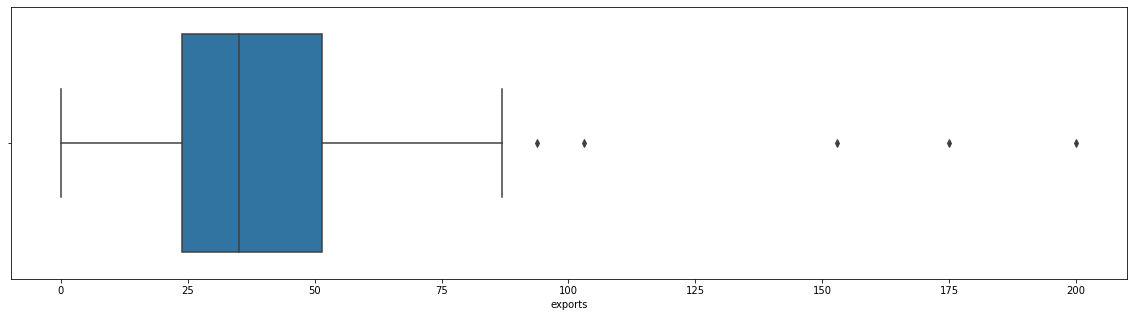

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(x = num_df.exports, data =num_df)

#### Again not a lot of outliers so we'll keep it as is

<AxesSubplot:xlabel='life_expec'>

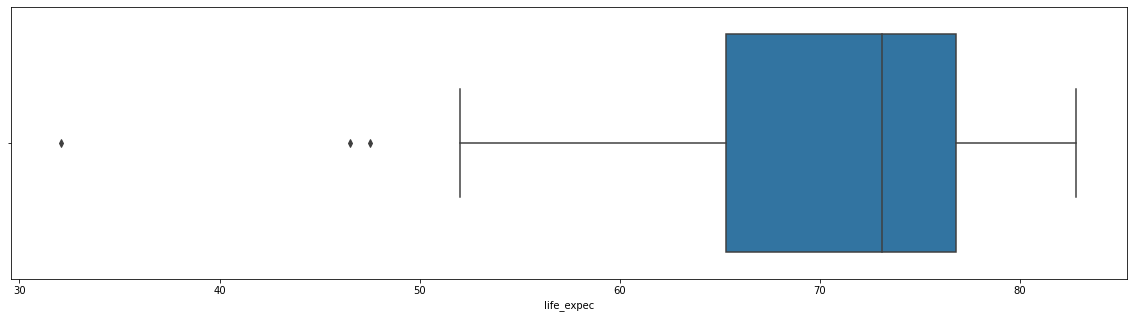

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(x = num_df.life_expec, data =num_df)

#### There are a few countries with life expectancy less that 40 years also, this doesn't seem right, although we might need expect advise on this, we will remove the lower outliers

<AxesSubplot:xlabel='child_mort'>

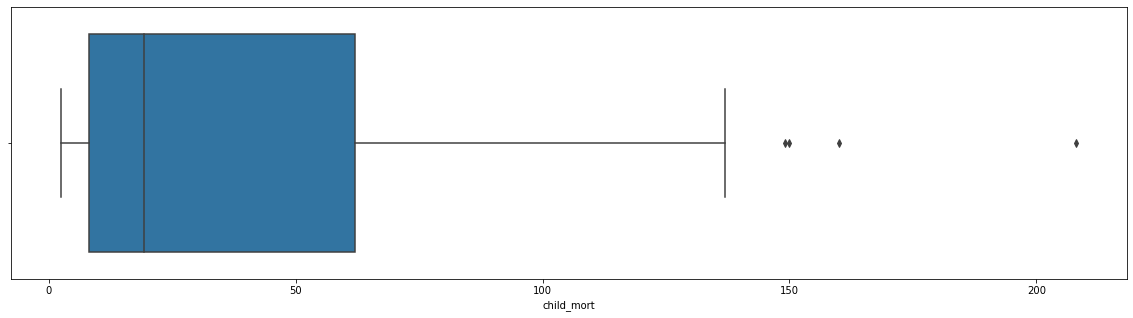

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(x = num_df.child_mort, data =num_df)

#### Again, very few outliers here as well, but a mortality rate >200 seems a bit off,but if we see even the 75%ile is really high as well, so lets not do any treatment here. We can come back here after firts iteration of analysis

<AxesSubplot:xlabel='inflation'>

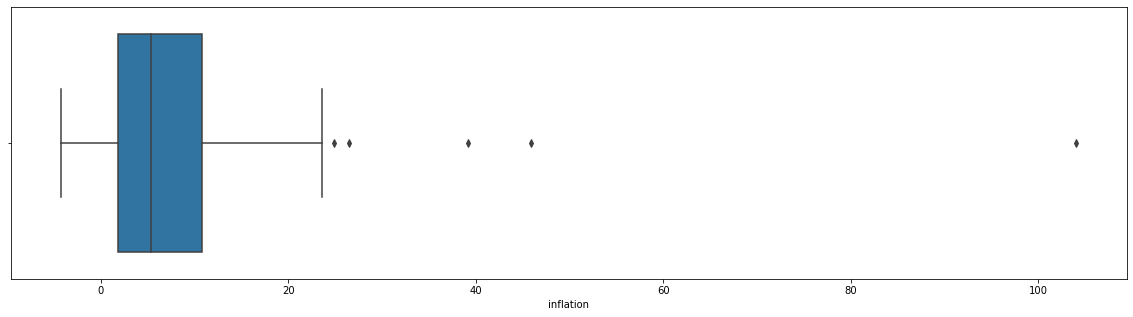

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(x = num_df.inflation, data =num_df)

#### Again very few outliers, but there might be cases where inflation is really high, so we are not doing any analysis here without any expert opinion

<AxesSubplot:xlabel='total_fer'>

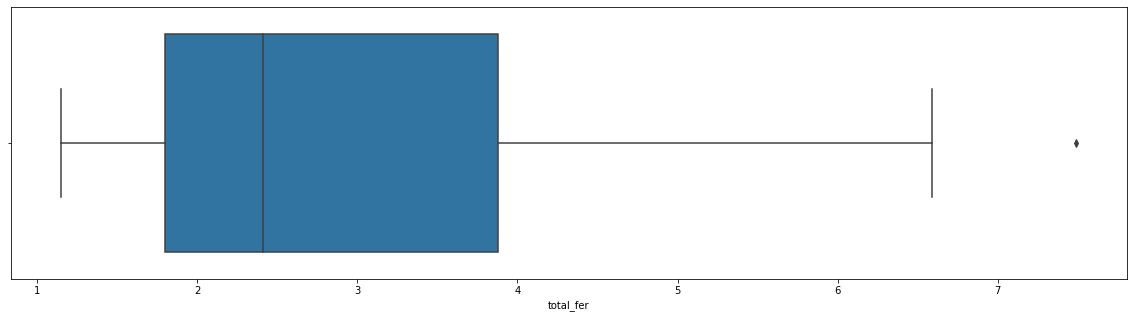

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(x = num_df.total_fer, data =num_df)

#### Not a lot of underlyers so nothing to be done here

<AxesSubplot:xlabel='health'>

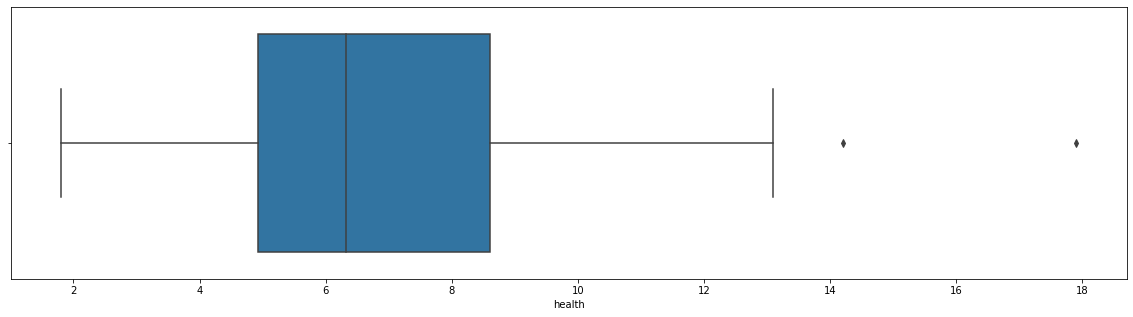

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(x = num_df.health, data =num_df)

 #### Not a lot of outliers so would not impact our analysis much, hence we do not do anything. Post this we see that we want to do our outlier treatment on gdpp and income (upper cap treatment) and life_expec (lower cap treatment)

In [ ]:
# removing (statistical) outliers
Q1 = df.gdpp.quantile(0.05)
Q3 = df.gdpp.quantile(0.95)
IQR = Q3 - Q1
df = df[(num_df.gdpp <= Q3 + 1.5*IQR)]


Q1 = num_df.income.quantile(0.05)
Q3 = num_df.income.quantile(0.95)
IQR = Q3 - Q1
df = df[(num_df.income <= Q3 + 1.5*IQR)]


Q1 = num_df.life_expec.quantile(0.05)
Q3 = num_df.life_expec.quantile(0.95)
IQR = Q3 - Q1
df = df[(num_df.life_expec >= Q1 - 1.5*IQR)]



#### Now we draw the graphs again to check out the difference after removing the outliers

<AxesSubplot:xlabel='income'>

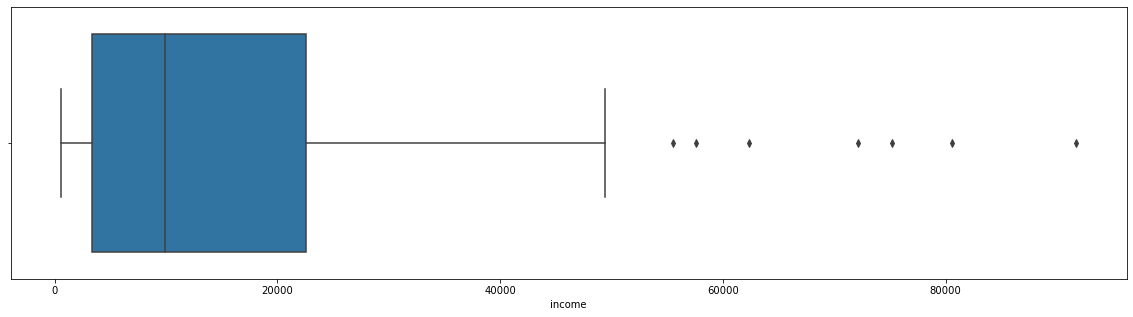

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(x = df.income, data =df)

<AxesSubplot:xlabel='life_expec'>

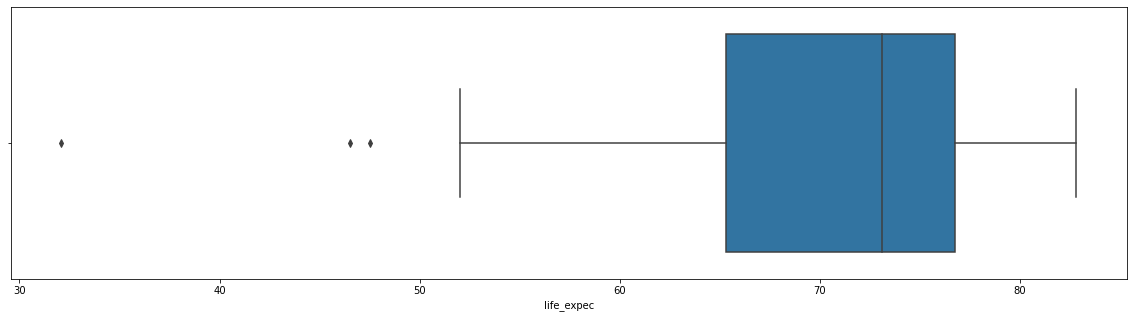

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(x = df.life_expec, data =df)

##### We see based on statistical metrics some of the outliers are removed without any major loss of data and with this we can move now to the further stages, which is to scaling,  checking cluster tendency and then modelling

#### We need to create the numeric dataframe again because we just removed outliers so that might change the dimensions

In [ ]:
num_df = df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]

### Bivariate Analysis

#### As part of the bivariate analysis we'll do correlation matrix, heatmaps, scatter plots in order to find teh relationships between variables and see how best we can go forward with our clustering modelling

In [ ]:
df_corr = num_df.corr()

df_corr

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.315769,-0.210884,-0.131981,-0.556013,0.288408,-0.886385,0.848146,-0.484613
exports,-0.315769,1.000000,-0.107147,0.745253,0.545967,-0.107135,0.313128,-0.318194,0.417368
health,-0.210884,-0.107147,1.000000,0.086292,0.214763,-0.258836,0.224756,-0.205363,0.396334
imports,-0.131981,0.745253,0.086292,1.000000,0.172382,-0.248122,0.060556,-0.163016,0.138107
income,-0.556013,0.545967,0.214763,0.172382,1.000000,-0.161288,0.643924,-0.536197,0.904288
inflation,0.288408,-0.107135,-0.258836,-0.248122,-0.161288,1.000000,-0.239983,0.316983,-0.227032
life_expec,-0.886385,0.313128,0.224756,0.060556,0.643924,-0.239983,1.000000,-0.760447,0.600902
total_fer,0.848146,-0.318194,-0.205363,-0.163016,-0.536197,0.316983,-0.760447,1.000000,-0.458162
gdpp,-0.484613,0.417368,0.396334,0.138107,0.904288,-0.227032,0.600902,-0.458162,1.000000


<AxesSubplot:>

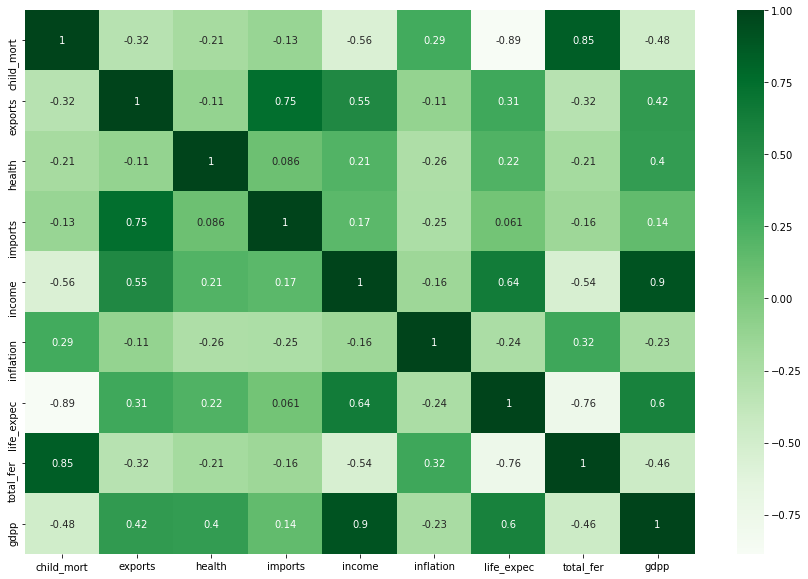

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df_corr, cmap = 'Greens', annot = True)

#### From the heatmap we see that Income and Gdpp are very highly co-related and child_mort and Total_fer too are pretty much very highly correlated, also life_expec and child_mortality is highly negetively correlated and hence, we might want to see if we want to include all variables in our clustering modelling, since a couple of them might be double counted, we might need business insights here, because even though some variables are highly correlated the meaning of those are different and could be important factors in segmentation. So overall we wont be dropping anything and would do our analysis based on all the variables

#### Lets now plot pairplots to check out the scatter plots between the variables, Thsi will give us a nice idea on how segmentation would look like once modelling is comepleted

<Figure size 1440x1080 with 0 Axes>

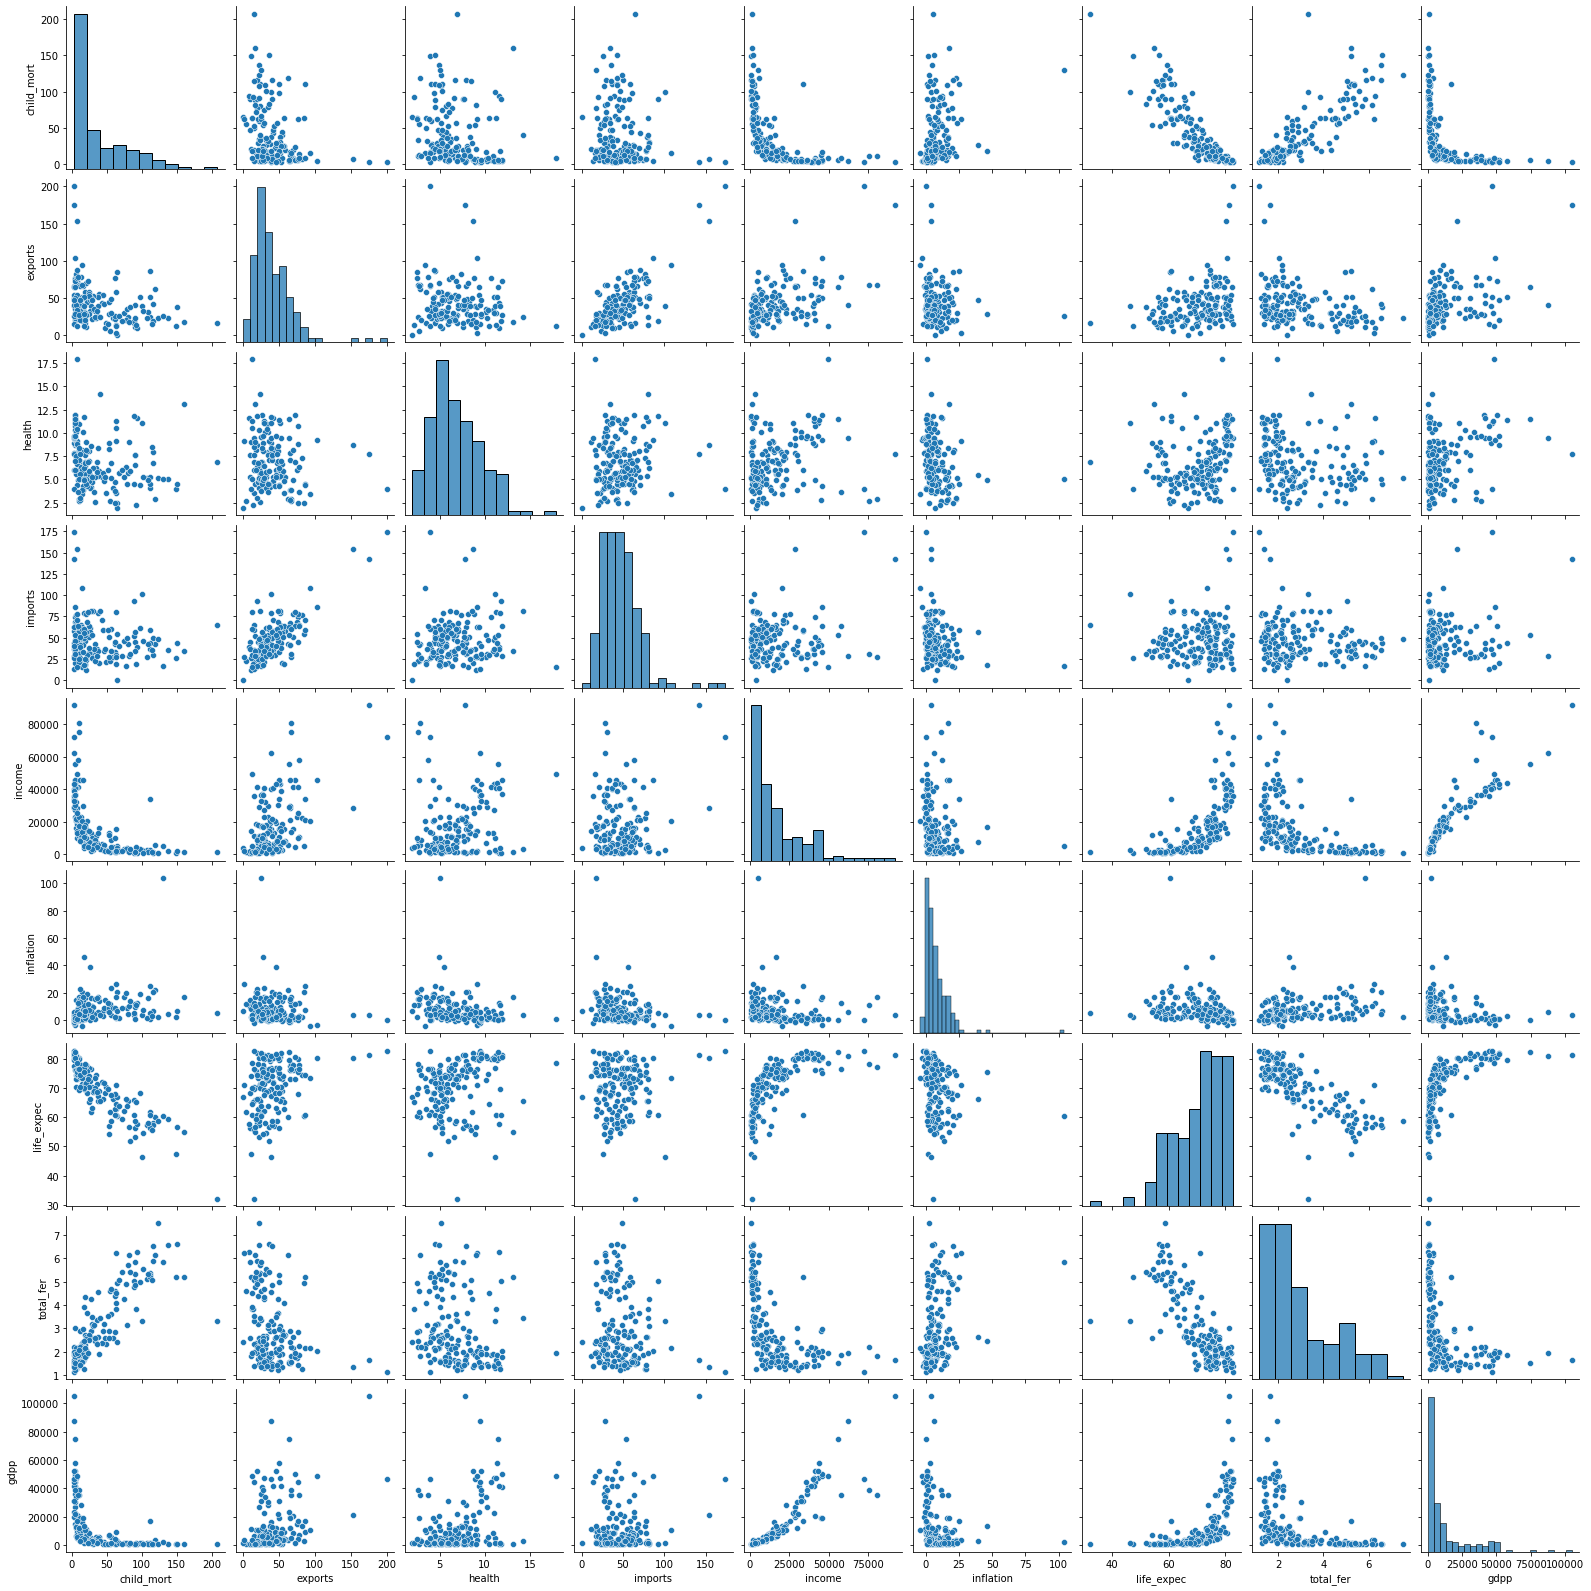

In [ ]:
plt.figure(figsize = (20, 15))
sns.pairplot(num_df)

#### The pair plots are great but so mot give a great picture of how the scatter would look liek once we have done the modelling, lets go forward and complete modelling and then draw scatter plots to checkout the  segmentations graphically. First step before modelling would be to scale the data to normal format so that modelling is insightful

### Scaling

In [ ]:
# Scaling
scaler = StandardScaler()

# fit_transform
num_df_scaled = scaler.fit_transform(num_df)
num_df_scaled.shape

(166, 9)

In [ ]:
# Changing scaled data to a df

num_df_scaled = pd.DataFrame(num_df_scaled)
num_df_scaled.columns = num_df.columns
num_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.285341,-1.132262,0.270004,-0.088197,-0.857748,0.156410,-1.613131,1.895616,-0.678732
1,-0.542572,-0.474423,-0.108804,0.065058,-0.378307,-0.311873,0.653990,-0.861767,-0.479766
2,-0.276829,-0.094338,-0.984108,-0.647370,-0.207160,0.786464,0.676549,-0.041826,-0.458953
3,2.000611,0.779125,-1.469570,-0.171037,-0.610536,1.382462,-1.173241,2.120438,-0.511268
4,-0.699037,0.165142,-0.300047,0.491687,0.150116,-0.600412,0.710386,-0.544370,-0.023556


### Checking cluster tendency using Hopkin statistics

In [ ]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
hopkins(num_df_scaled)

0.8536092037801916

#### The value of Hopkins metric is pretty high so we can go forward and do our modelling on the data set. So for modelling we would focus on K- means and Heirarchical modelling. We would do the following steps in modelling:

1. Determine optimal K using elbow curve method and silhouette method
2. Perform K means using final value of K
3. Visualize the clusters using scatter plots and box plots
4. Perform heirarchical clustering
5. Plot single linkage Dendogram
6. Plot complete linkage Dendogram
7. Visualize the clusters

### K means Clustering

#### Using elbow curve to determine K

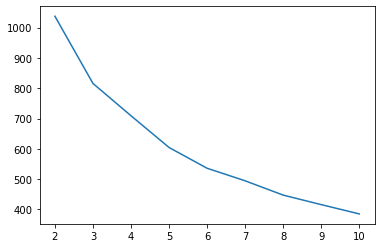

In [ ]:
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(num_df_scaled)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

#### So by using  elbow curve method, we get a 3 as the K value, but we could use 4 as well the change of slope is not too big from 3 to 4. Lets see what Sihouette score gives us, if we are still confused we would go ahead with both 3 and 4 and see what gives us better results

In [ ]:

# silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(num_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(num_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.28915373549301415
For n_clusters=3, the silhouette score is 0.2878272991957743
For n_clusters=4, the silhouette score is 0.300505432000499
For n_clusters=5, the silhouette score is 0.30593469055809375
For n_clusters=6, the silhouette score is 0.23081100702181306
For n_clusters=7, the silhouette score is 0.249623925590119
For n_clusters=8, the silhouette score is 0.2502187556174291


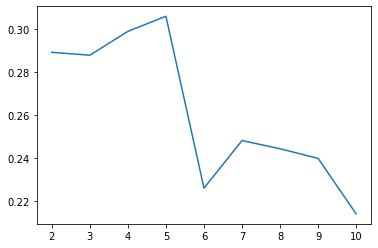

In [ ]:

# silhouette analysis plots
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(num_df_scaled)
    ss.append([k, silhouette_score(num_df_scaled, kmeans.labels_)])

sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

#### From Silhouette method we get 4 as the highest score, so lets go ahead and use 4 as the K value and then we can repeat our modelling using 3 and then compare the results

In [ ]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50, random_state = 0)
kmeans.fit(num_df_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=0)

In [ ]:
# assign the label
df['cluster_id'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [ ]:
df.cluster_id.value_counts()

0    86
1    48
2    29
3     3
Name: cluster_id, dtype: int64

#### We see the clustering happened but only 3 records were put in cluster number 3. So we might want to shift back to using 3 clusters for the sake of making meaningful decisions

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

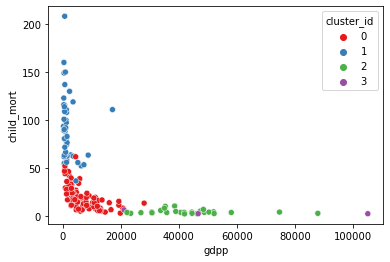

In [ ]:
sns.scatterplot(x = 'gdpp', y ='child_mort', hue = 'cluster_id', data = df, palette = 'Set1')

<AxesSubplot:xlabel='gdpp', ylabel='income'>

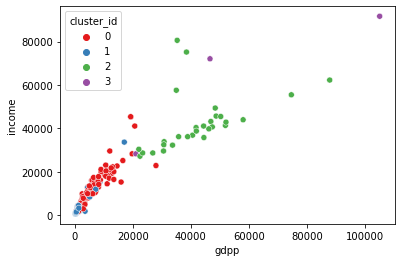

In [ ]:
sns.scatterplot(x = 'gdpp', y ='income', hue = 'cluster_id', data = df, palette = 'Set1')

<AxesSubplot:xlabel='income', ylabel='child_mort'>

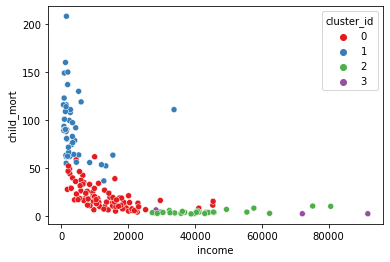

In [ ]:
sns.scatterplot(x = 'income', y ='child_mort', hue = 'cluster_id', data = df, palette = 'Set1')

#### We found some beautiful scatter plots with their clusters but since cluster 3 has just 3 records we  might want to change to k = 3

<AxesSubplot:xlabel='cluster_id', ylabel='child_mort'>

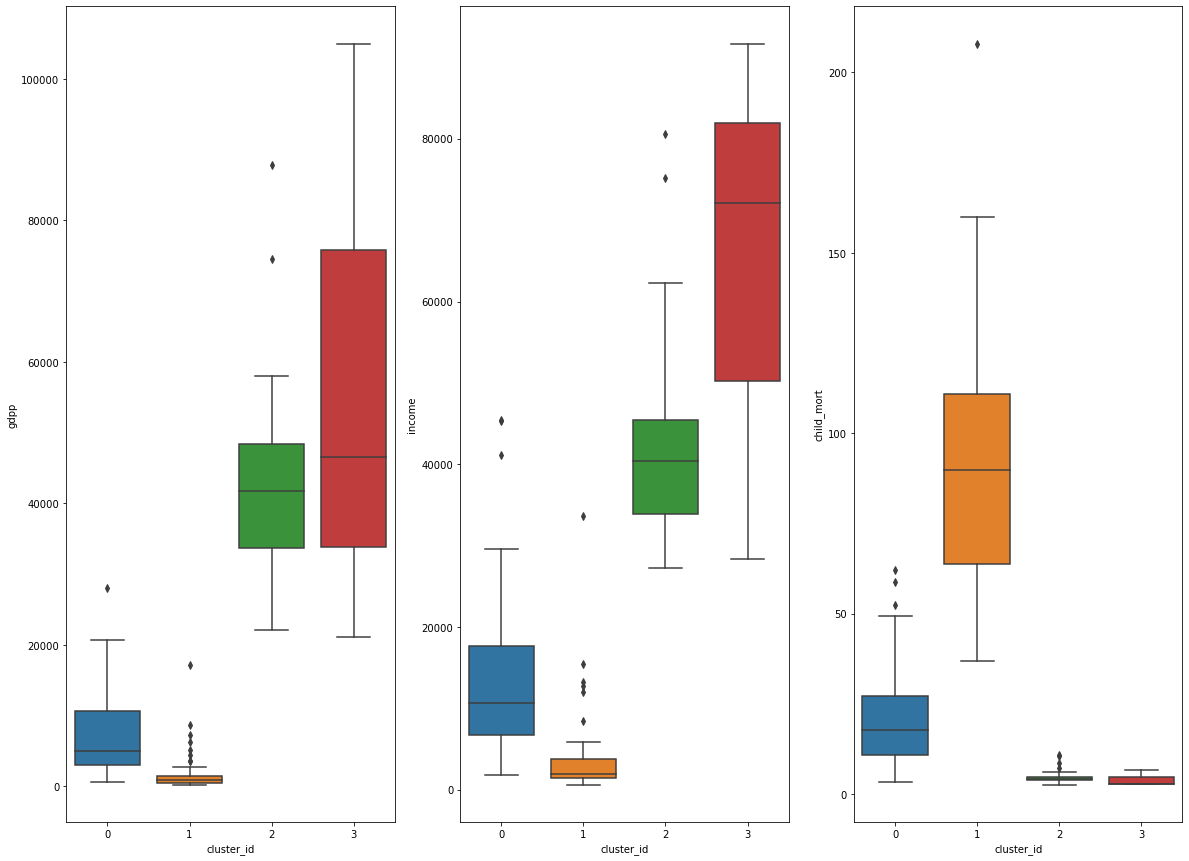

In [ ]:
plt.figure(figsize = (20,15))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id', y='gdpp', data= df)




plt.subplot(1,3,2)
sns.boxplot(x='cluster_id', y='income', data= df)



plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='child_mort', data= df)

#### So we see that the clusters 3 and 2 state somewhat the same facts and the 1, 0 are quite similar, we if we chage to 3 clusters most likely cluster number 3 and 2 will merge. Also from the graph we see that cluster number 1 has the least GDP and Income and Cluster number 3 have most GDP, Income and least Child Mortality rate, which means we can safely say cluster 3 are the most developed countries

In [ ]:
df[['gdpp', 'child_mort', 'income', 'cluster_id']].groupby('cluster_id').mean()

,gdpp,child_mort,income
cluster_id,,,
0,6988.069767,20.889535,13076.162791
1,1902.916667,92.366667,3937.770833
2,42403.448276,4.813793,42500.000000
3,57566.666667,4.133333,64033.333333


#### Again if we mean the values of the variables against their cluster numbers, we can say that business point of view, it makes more sense to do 3 clusters instead of 4 as we could merge cluster number 2 and cluster number 3 where anyways there were only 3 records

In [ ]:
#Using k = 3 to do the same analysis
kmeans = KMeans(n_clusters=3, max_iter=50, random_state = 0)
kmeans.fit(num_df_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=0)

In [ ]:
# assign the label
df['cluster_id'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [ ]:
df.cluster_id.value_counts()

0    84
1    47
2    35
Name: cluster_id, dtype: int64

#### Now we see somewhat equal number of records in all cluster, this seems better that using 4 as K

In [ ]:
mean_df = df[['gdpp', 'child_mort', 'income', 'cluster_id']].groupby('cluster_id').mean()
mean_df

,gdpp,child_mort,income
cluster_id,,,
0,6486.452381,21.927381,12305.595238
1,1922.382979,92.961702,3942.404255
2,41700.000000,4.885714,43405.714286


##### From this we see that cluster ID 1 are the most under-developed countries and cluster number 2 are the most developed countries because the per capita GDP and Income is soo much higher than other clusters and child mortality rate is the lowest

In [ ]:
required_cluster = mean_df.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(1)
reqd = required_cluster.reset_index()
cluster = int(reqd.cluster_id)
cluster

1

<AxesSubplot:xlabel='cluster_id', ylabel='child_mort'>

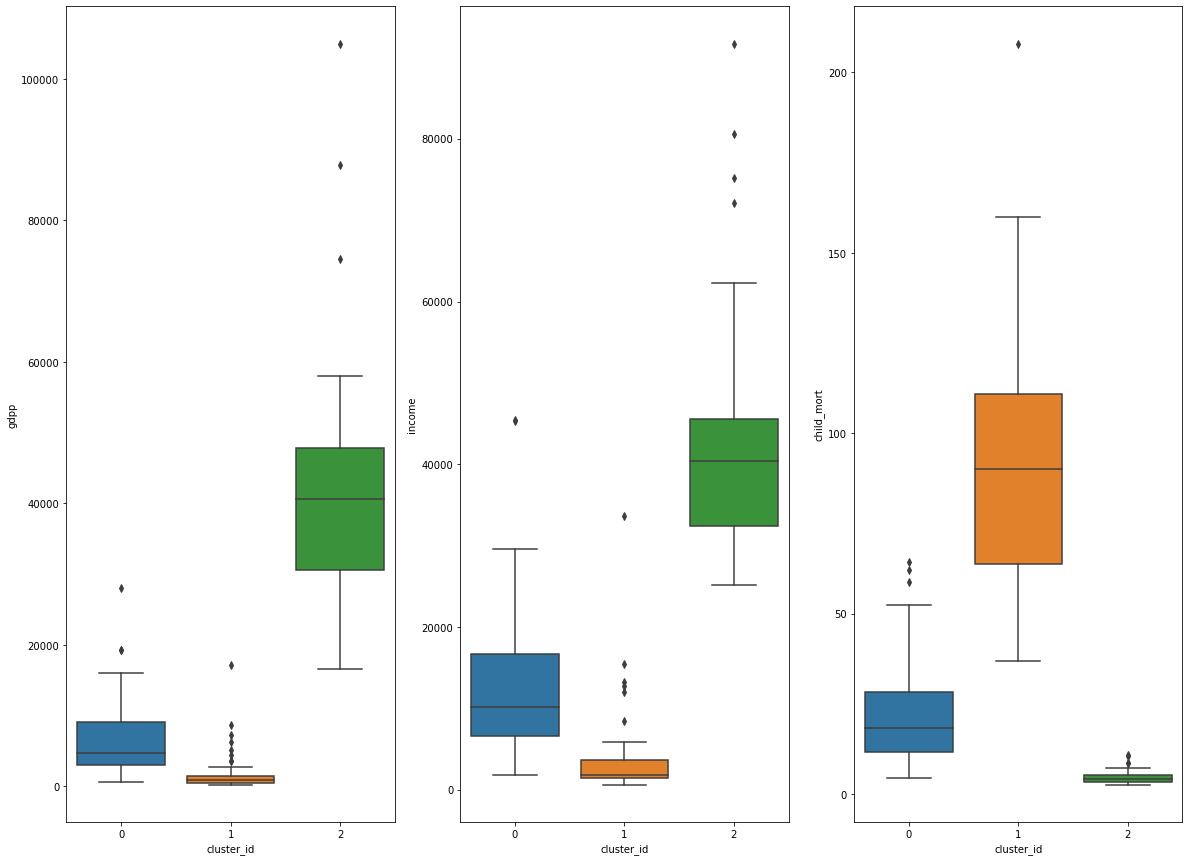

In [ ]:
plt.figure(figsize = (20,15))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id', y='gdpp', data= df)


plt.subplot(1,3,2)
sns.boxplot(x='cluster_id', y='income', data= df)


plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='child_mort', data= df)


#### We realize that cluster 2 has the highest GDP and Income and lowest Child Mortality Rate, also we realize that cluster 1 has highest child mortality rate and lowest GDP and Income, this is the population which the CEO should look at

<AxesSubplot:xlabel='gdpp', ylabel='income'>

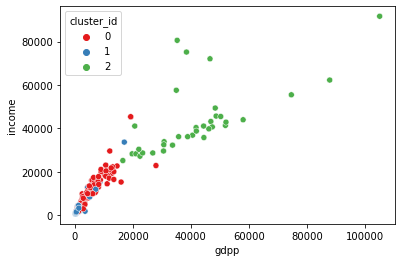

In [ ]:
sns.scatterplot(x = 'gdpp', y ='income', hue = 'cluster_id', data = df, palette = 'Set1')

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

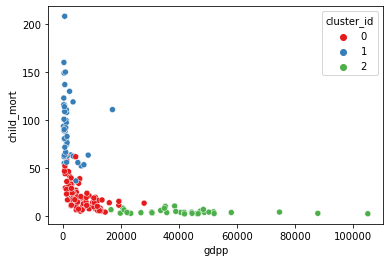

In [ ]:
sns.scatterplot(x = 'gdpp', y ='child_mort', hue = 'cluster_id', data = df, palette = 'Set1')

<AxesSubplot:xlabel='income', ylabel='child_mort'>

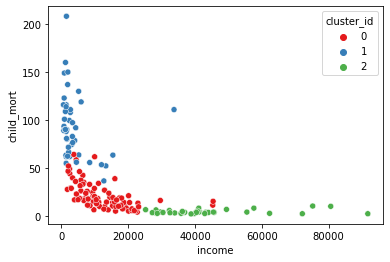

In [ ]:
sns.scatterplot(x = 'income', y ='child_mort', hue = 'cluster_id', data = df, palette = 'Set1')

#### Now we see some beautiful clustering scatter plots with 3 clusters pretty much denoting clustering happened nicely, now we hall move ahead to draw insights from the clusters and find recommendations

In [ ]:
c1 = df[df['cluster_id']==cluster]
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1


In [ ]:
c1.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1


### When we choose cluster 0 and sort it by the per capita GDP, Child Mortality Rate, Income we find that the top 5 countries in dire need to relief funds are Burundi, Liberia, Congo Republic, Niger and Sierra Leone

#### Lets now move forward to the heirarchical clustering to see whether our results match and if not what differences we observe

### Heirarchical Clustering

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [ ]:
num_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.285341,-1.132262,0.270004,-0.088197,-0.857748,0.156410,-1.613131,1.895616,-0.678732
1,-0.542572,-0.474423,-0.108804,0.065058,-0.378307,-0.311873,0.653990,-0.861767,-0.479766
2,-0.276829,-0.094338,-0.984108,-0.647370,-0.207160,0.786464,0.676549,-0.041826,-0.458953
3,2.000611,0.779125,-1.469570,-0.171037,-0.610536,1.382462,-1.173241,2.120438,-0.511268
4,-0.699037,0.165142,-0.300047,0.491687,0.150116,-0.600412,0.710386,-0.544370,-0.023556


#### using Single Linkage first

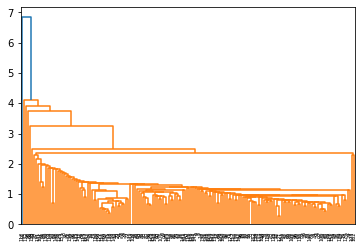

In [ ]:
# single linkage
mergings = linkage(num_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### using Complete Linkage now as the densogram of the single linkage is not very intuitive and we can't draw much insights from it

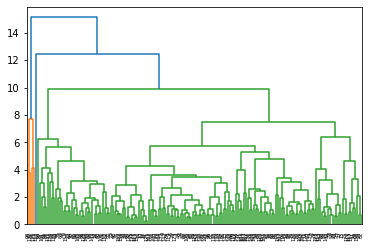

In [ ]:
# complete linkage
mergings = linkage(num_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Cut Tree Model

 #### Intuitively we are cutting at length = 10 to find the optimum number of clusters, lets see what the results are

In [ ]:
# 3 clusters
cluster_labels_3 = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df['cluster_labels_3'] = cluster_labels_3
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels_3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0


In [ ]:
df.cluster_labels_3.value_counts()

0    161
1      4
2      1
Name: cluster_labels_3, dtype: int64

#### When we cluster by choosing 3 we do not have a very great segmentation as most of the records get segmented in the cluster 0 . To change this, lets choose length of dendrogram to be 9 and hence we would use 4 clusters this time to segment our data

In [ ]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels_3,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,1


In [ ]:
df.cluster_labels.value_counts()

1    125
0     36
2      4
3      1
Name: cluster_labels, dtype: int64

#### Clustering into 4 clusters is so much btter than the 3 ones but still cluster 2 and cluster 3 have very less records, we can try and cluster into 5 segments but because we do not want a lot of clusters lets just go forward and analyse what we see from these 4 clusters

In [ ]:
mean_df2 = df[['gdpp', 'child_mort', 'income', 'cluster_labels']].groupby('cluster_labels').mean()
mean_df2

,gdpp,child_mort,income
cluster_labels,,,
0,1548.055556,99.266667,3088.416667
1,14825.232000,21.213600,19274.640000
2,45875.000000,6.700000,53125.000000
3,2330.000000,130.000000,5150.000000


In [ ]:
mean_df2.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(1)

,gdpp,child_mort,income
cluster_labels,,,
0,1548.055556,99.266667,3088.416667


In [ ]:
required_cluster2 = mean_df2.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(1)
reqd2 = required_cluster2.reset_index()
cluster2 = int(reqd2.cluster_labels)
cluster2

0

<AxesSubplot:xlabel='cluster_labels', ylabel='child_mort'>

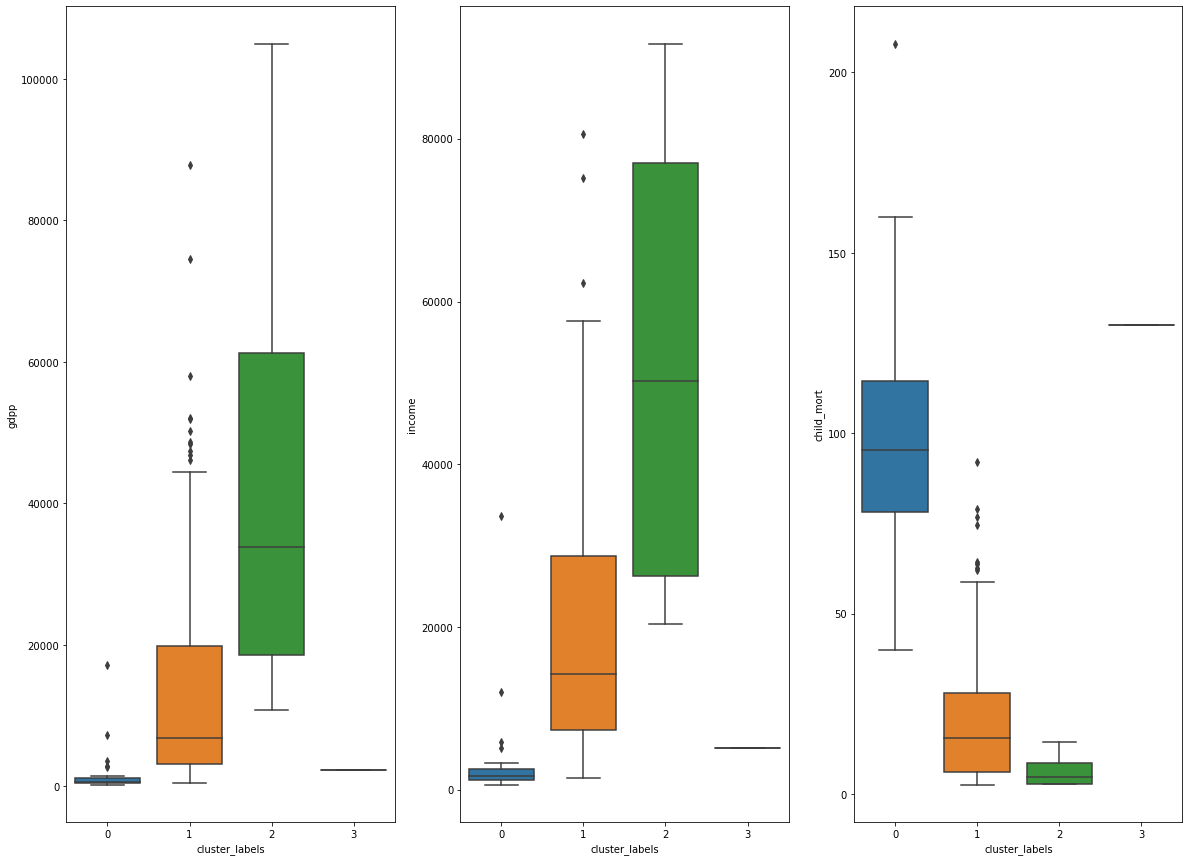

In [ ]:
plt.figure(figsize = (20,15))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_labels', y='gdpp', data= df)


plt.subplot(1,3,2)
sns.boxplot(x='cluster_labels', y='income', data= df)


plt.subplot(1,3,3)
sns.boxplot(x='cluster_labels', y='child_mort', data= df)


#### We see that 0 is the cluster where chirl mortality rate is quite high and income and gdp are pretty less, also 3 is somewhat near to 0 but 3 has only 1 record so we should not take that into account, 1 and 2 have high income and gdp and very less child mortality rate so these countires seem to be developed

In [ ]:
c2 = df[df['cluster_labels']==cluster2]
c2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels_3,cluster_labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,0,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,0,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,0,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,0,0


In [ ]:
c2.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels_3,cluster_labels
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1,0,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1,0,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1,0,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1,0,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1,0,0


### After choosing 0 as our desired cluster and sorting the values based on GDP, Child Mortality and Income we find the top 5 countries in dire need to relief fiunds are Burundi, Liberia, Congo Republic, Niger and Sierra Leone

## Conclusion of the assignment: We see that the results and the recommendations to the CEO are the same in the cases of both K means and Heirarchical Clustering which are Burundi, Liberia, Congo Republic, Niger and Sierra Leone, even though the number of clusters observed in both the methods were different. K means should be used when the prblem statement is simpler and we have less data, heirarchical is more dofficult to scale once the data increases.